In [1]:
# importing the modules
using Plots;
using Printf

In [2]:
# calculate prediction
function calc_h0(x,theta)
    z = x*theta;
    h0 = 1 ./ ( 1 .+ ℯ.^(-z))
    return h0;
end;

In [3]:
# calculate loss
function calc_cost(h0,y)
    n = length(y);
    (1/n)*(-((transpose(y)*log.(h0))+(transpose(1 .-y)*log.(1 .-h0))))
end;

In [4]:
# calculate gradients
function calc_dw(x,y,h0)
    return 1/(size(x)[1])*(transpose(h0 - y)*x);
end;

In [5]:
# dataset
x = [ones(50) collect(1:50)];
y = ((x[:,2]) .- 19)
z = 1 ./(1 .+ℯ .^(-y))

# encoding dependent variable
y = []
for i in z
    if i >= 0.5
        push!(y,1);
    else
        push!(y,0);
    end;
end;

In [6]:
# initialize weights
theta = rand(2);

In [7]:
# hyperparameters
epochs = 40000
aplha = 0.01

# training loop
for i in 1:epochs
    
    # make prediction
    h0 = calc_h0(x,theta);
    
    # calculate cost
    cost = calc_cost(h0,y);
    
    # gradient update
    dw = calc_dw(x,y,h0);
    theta = theta - aplha.*transpose(dw)
    
    if i%(epochs/10) == 0
        @printf("Iteration: %d    cost: %.2f\n",i,cost);
    end;
end;

Iteration: 4000    cost: 0.17
Iteration: 8000    cost: 0.13
Iteration: 12000    cost: 0.11
Iteration: 16000    cost: 0.10
Iteration: 20000    cost: 0.09
Iteration: 24000    cost: 0.08
Iteration: 28000    cost: 0.08
Iteration: 32000    cost: 0.08
Iteration: 36000    cost: 0.07
Iteration: 40000    cost: 0.07


In [8]:
# make predictions
y_hat = []
for i in calc_h0(x,theta)
    if i >= 0.5
        push!(y_hat,1)
    else
        push!(y_hat,0)
    end;
end;

In [9]:
@printf("Accuracy is :%d",sum(y_hat .== y))

Accuracy is :50

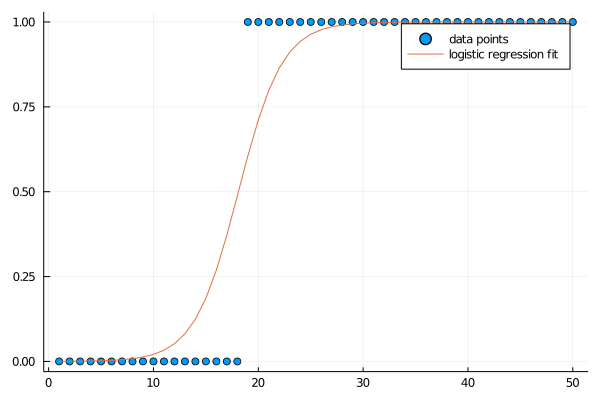

In [10]:
plot!(y,seriestype="scatter",label="data points")
plot!(calc_h0(x,theta),label="logistic regression fit")

In [12]:
@printf("the equation of the classification line is %.2fx + %.2f",theta[2],theta[1])

the equation of the classification line is 0.48x + -8.61